## Summarized Report of Key Steps Performed

### 1. Data Loading & Preprocessing
###- **Loaded the dataset**: The `diabetes.csv` dataset was successfully loaded.
#### Handled missing values**:
#### - Filled categorical columns with the mode.
#### - Filled numerical columns with the median.

### 2. Data Splitting & Feature Scaling
####Split the dataset**:
 #### - Divided the data into features (X) and target variable (y).
 #### - Split the data into training (80%) and test sets (20%)
#### Applied Standard Scaling**: Normalized feature values for better model performance.

### 3. Finding Optimal K for KNN
####*Cross-validation**: Used to determine the best k (number of neighbors) for KNN.
#### **Optimal k selection**: Chose the k value that provided the highest accuracy on the training data.

### 4. Training & Evaluating KNN with Euclidean Distance
#### **Trained KNN classifier**: Used Euclidean distance for training.
#### **Predicted test results**: Evaluated using Confusion Matrix, F1 Score, and Accuracy Score.

### 5. Training & Evaluating KNN with Cosine Similarity
#### **Trained KNN classifier**: Used Cosine similarity for training.
#### **Performance evaluation**: Used the same metrics for comparison.

### 6. Visualizing Results
#### **Heatmaps**: Used Seaborn heatmaps to visualize confusion matrices for better interpretability.

### 7. Comparing Performance & Statistical Testing
#### **Comparison of accuracy**: Evaluated scores between Euclidean and Cosine KNN models.
#### **Statistical testing**: Performed a T-test to check if the difference in predictions was statistically significant.
#### **Distance metric performance**: Printed which distance metric performed better.

In [1]:
import pandas as pd
import numpy as np

In [5]:
# Load the dataset
df = pd.read_csv(r"C:\Users\SMART TECH\Desktop\AppliedNLPMaterial-master\diabetes.csv")


In [13]:
def handle_missing_values(data):
    for column in data.columns:
        if data[column].dtype == 'object':
            data[column] = data[column].fillna( data[column].mode()[0])   # Categorical columns
        else:
            data[column] = data[column].fillna( data[column].median())   # for numerical
        return data

df = handle_missing_values(df)

In [50]:
# Convert categorical columns to 'category' type
df['location'] = df['location'].astype('category')
df['gender'] = df['gender'].astype('category')
df['frame'] = df['frame'].astype('category')

# Convert categories to numerical codes
df['location'] = df['location'].cat.codes
df['gender'] = df['gender'].cat.codes
df['frame'] = df['frame'].cat.codes

print(df.head()) 

     id   chol  stab.glu   hdl  ratio  glyhb  location  age  gender  height  \
0  1000  203.0        82  56.0    3.6   4.31         0   46       0    62.0   
1  1001  165.0        97  24.0    6.9   4.44         0   29       0    64.0   
2  1002  228.0        92  37.0    6.2   4.64         0   58       0    61.0   
3  1003   78.0        93  12.0    6.5   4.63         0   67       1    67.0   
4  1005  249.0        90  28.0    8.9   7.72         0   64       1    68.0   

   weight  frame  bp.1s  bp.1d  bp.2s  bp.2d  waist   hip  time.ppn  Outcome  
0   121.0      1  118.0   59.0  149.0   92.0   29.0  38.0     720.0        1  
1   218.0      0  112.0   68.0  149.0   92.0   46.0  48.0     360.0        0  
2   256.0      0  190.0   92.0  185.0   92.0   49.0  57.0     180.0        1  
3   119.0      0  110.0   50.0  149.0   92.0   33.0  38.0     480.0        0  
4   183.0      1  138.0   80.0  149.0   92.0   44.0  41.0     300.0        1  


In [22]:
df.isnull().sum()

id          0
chol        0
stab.glu    0
hdl         0
ratio       0
glyhb       0
location    0
age         0
gender      0
height      0
weight      0
frame       0
bp.1s       0
bp.1d       0
bp.2s       0
bp.2d       0
waist       0
hip         0
time.ppn    0
Outcome     0
dtype: int64

In [52]:
# Split features and target variable
X = df.drop(columns=['Outcome'])
y = df['Outcome']

In [54]:

from sklearn.model_selection import train_test_split, cross_val_score# Split the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [62]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score# Feature scaling

# Find the optimal number of neighbors using cross-validation
best_k = 1
best_score = 0
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k, p=2, metric='euclidean')
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    avg_score = scores.mean()
    if avg_score > best_score:
        best_score = avg_score
        best_k = k

print(f"Optimal number of neighbors: {best_k}")

Optimal number of neighbors: 14


In [66]:
# Define and train the KNN classifier with Euclidean distance
knn_euclidean = KNeighborsClassifier(n_neighbors=best_k, p=2, metric='euclidean')
knn_euclidean.fit(X_train, y_train)

# Predict test results
y_pred_euclidean = knn_euclidean.predict(X_test)


In [68]:
# Evaluate using confusion matrix, f1_score, and accuracy score
cm_euclidean = confusion_matrix(y_test, y_pred_euclidean)
f1_euclidean = f1_score(y_test, y_pred_euclidean)
accuracy_euclidean = accuracy_score(y_test, y_pred_euclidean)

print("Confusion Matrix (Euclidean):\n", cm_euclidean)
print("F1 Score (Euclidean):", f1_euclidean)
print("Accuracy (Euclidean):", accuracy_euclidean)

Confusion Matrix (Euclidean):
 [[23 16]
 [30 12]]
F1 Score (Euclidean): 0.34285714285714286
Accuracy (Euclidean): 0.43209876543209874


In [70]:
# Define and train the KNN classifier with Cosine similarity
knn_cosine = KNeighborsClassifier(n_neighbors=best_k, metric='cosine')
knn_cosine.fit(X_train, y_train)

KNeighborsClassifier(metric='cosine', n_neighbors=14)

In [74]:
# Predict test results
y_pred_cosine = knn_cosine.predict(X_test)

# Evaluate using confusion matrix, f1_score, and accuracy score
cm_cosine = confusion_matrix(y_test, y_pred_cosine)
f1_cosine = f1_score(y_test, y_pred_cosine)
accuracy_cosine = accuracy_score(y_test, y_pred_cosine)

print("\nConfusion Matrix (Cosine):\n", cm_cosine)
print("F1 Score (Cosine):", f1_cosine)
print("Accuracy (Cosine):", accuracy_cosine)



Confusion Matrix (Cosine):
 [[25 14]
 [30 12]]
F1 Score (Cosine): 0.35294117647058826
Accuracy (Cosine): 0.4567901234567901


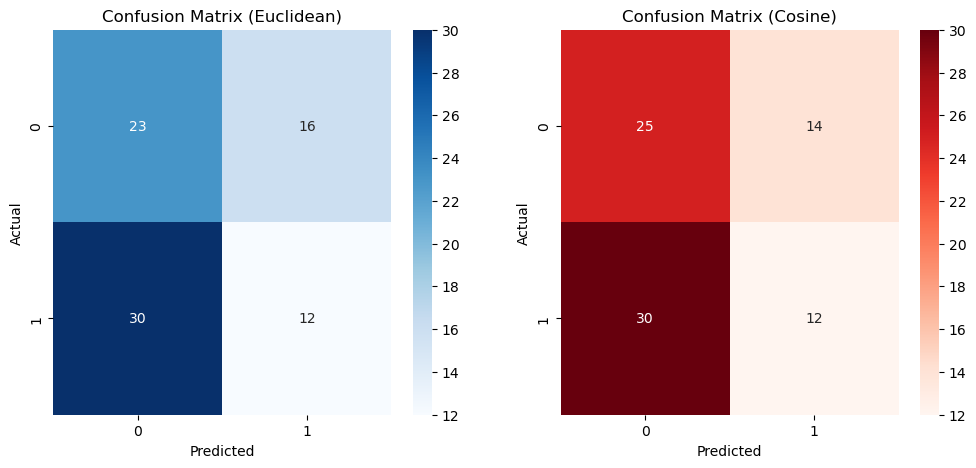

In [78]:

import seaborn as sns
import matplotlib.pyplot as plt

# Visualize confusion matrices
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(cm_euclidean, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Euclidean)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(cm_cosine, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix (Cosine)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()


In [82]:
from scipy.stats import ttest_ind

# Statistical significance testing
t_stat, p_value = ttest_ind(y_pred_euclidean, y_pred_cosine, equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Compare results
if accuracy_euclidean > accuracy_cosine:
    print("Euclidean distance performed better.")
elif accuracy_cosine > accuracy_euclidean:
    print("Cosine similarity performed better.")
else:
    print("Both metrics performed equally well.")


T-statistic: 0.3313829924943068, P-value: 0.7407889916953235
Cosine similarity performed better.
